<a href="https://colab.research.google.com/github/Gerardomn/TCD/blob/master/Session3_TCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Utilización de un método de regresión lineal para generar un modelo que permita realizar un mantenimiento predictivo, a partir de datos de un conjunto de sensores de turbinas hidraulicas**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = "https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/PM_train.txt" #iportar datos desde una url

In [5]:
train

'https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/PM_train.txt'

*Al generar el dataframe directamente de train, la primera línea la toma como encabezado. Como se observa al ejecutar la siguiente línea.*

In [0]:
pd.read_csv(train)

*Es por eso que se escribe la siguiente línea, para generar un dataframe adecuado.*

In [4]:
dfTrain = pd.read_csv(train, sep=' ',header=None) #sep es para indicar que la separación entre datos sea un espacio en blanco
dfTrain.head() #header es para especificar que el encabezado conste sólo de índices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


*De acuerdo con la información que se conoce a priori del conjunto de datos, se genera la siguiente lista para funcionar como los nombres de columnas del dataframe*

In [0]:
colNames = ['id','cycle','setting1','setting2','setting3', \
            's1','s2','s3','s4','s5','s6','s7','s8','s9','s10', \
            's11','s12','s13','s14','s15','s16','s17','s18','s19', \
            's20','s21']

In [16]:
dfTrain.drop([26,27], axis=1,inplace=True) #inplace por default no modifica el data frame
dfTrain.columns #drop elimina renglones o columnas

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [17]:
dfTrain.columns = colNames #se añade la columna de encabezados definida como columns
dfTrain.head() #muestra los primeros cinco renglones

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [18]:
dfTrain.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [19]:
dfTrain.tail() #últimos 5 términos

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,21.61,550.79,2388.26,9061.48,1.3,48.20,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [20]:
dfTrain.dtypes

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
dtype: object

*La siguiente línea es para saber si hay datos faltantes o nulos en el archivo*

In [23]:
dfTrain.isnull().sum() #regresa una muestra booleana sin el .sum

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

**¿Cómo puedo saber si algunos de los datos en las columnas sí cambiaron?** 

*calcular desviación estándar de los datos*

In [27]:
dfTrain.describe().loc["std",:]

id          2.922763e+01
cycle       6.888099e+01
setting1    2.187313e-03
setting2    2.930621e-04
setting3    0.000000e+00
s1          6.537152e-11
s2          5.000533e-01
s3          6.131150e+00
s4          9.000605e+00
s5          3.394700e-12
s6          1.388985e-03
s7          8.850923e-01
s8          7.098548e-02
s9          2.208288e+01
s10         4.660829e-13
s11         2.670874e-01
s12         7.375534e-01
s13         7.191892e-02
s14         1.907618e+01
s15         3.750504e-02
s16         1.556432e-14
s17         1.548763e+00
s18         0.000000e+00
s19         0.000000e+00
s20         1.807464e-01
s21         1.082509e-01
Name: std, dtype: float64

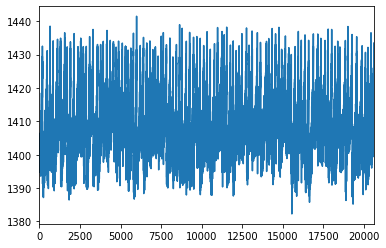

In [30]:
dfTrain.loc[:,"s4"].plot() #visualizando las variaciones de los datos

In [0]:
dfTrain = pd.concat([
    dfTrain.iloc[:,0:2], dfTrain.iloc[:,6:9],
    dfTrain.iloc[:,10:14], dfTrain.iloc[:,15:20],
    dfTrain.iloc[:,21], dfTrain.iloc[:,24:26]], axis=1)

In [33]:
dfTrain.describe().loc["std",:]

id       29.227633
cycle    68.880990
s2        0.500053
s3        6.131150
s4        9.000605
s6        0.001389
s7        0.885092
s8        0.070985
s9       22.082880
s11       0.267087
s12       0.737553
s13       0.071919
s14      19.076176
s15       0.037505
s17       1.548763
s20       0.180746
s21       0.108251
Name: std, dtype: float64

In [36]:
dfTrain.groupby('id')['cycle'].max() #agrupar tomando la columna cycle

id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle, Length: 100, dtype: int64

In [0]:
df_maxCycle = pd.DataFrame(dfTrain.groupby('id')['cycle'].max()) #creo un nuevo data frame ya que el groupby recuerda indices del DF original
df_maxCycle.reset_index(level=0, inplace=True)
df_maxCycle.columns = ["id", "last_cycle"]

In [39]:
df_maxCycle.head()

,id,last_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [0]:
dfTrain = pd.merge(dfTrain, df_maxCycle, on="id")

In [0]:
dfTrain["ttf"] = dfTrain['last_cycle'] - dfTrain['cycle']

In [0]:
dfTrain.drop(["last_cycle"], axis=1, inplace=True)

**DfTrain data frame con columna de tiempo antes de falla**

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [0]:
x = dfTrain.drop(["id","ttf"], axis=1)
y = dfTrain['ttf']

In [0]:
#random permutation
np.random.seed(0)
test_ids = np.random.permutation(len(x))

In [47]:
x.shape

(20631, 16)

In [0]:
#generando un conjunto de entrenamiento
t_75 = int(len(test_ids) - np.floor(len(test_ids)*.75))

In [0]:
x_train = x.iloc[test_ids[:-t_75]]
y_train = y.iloc[test_ids[:-t_75]]

In [0]:
x_test = x.iloc[test_ids[-t_75:]]
y_test = y.iloc[test_ids[-t_75:]]

In [58]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(x_test)

In [60]:
y_pred

array([139.66008374,  -5.93643823,  44.01841662, ...,  83.23265103,
       159.08454618, 145.99531839])

In [61]:
print(y_test.values)

[146  18  70 ...  63 180 156]


**Modelo de clasificación: Reduccion de dimensionalidad**

In [63]:
win = 30
dfTrain["ttf"].apply(lambda x: 1 if x <= win else 0) #lambda es para crear una función anónima y evitar un For

0        0
1        0
2        0
3        0
4        0
        ..
20626    1
20627    1
20628    1
20629    1
20630    1
Name: ttf, Length: 20631, dtype: int64

In [65]:
pd.cut(dfTrain['ttf'],2, labels = range(2)) #2 es el número de intervalos

0        1
1        1
2        1
3        1
4        1
        ..
20626    0
20627    0
20628    0
20629    0
20630    0
Name: ttf, Length: 20631, dtype: category
Categories (2, int64): [0 < 1]

Ahora para clasificación multiclases de acuerdo....

In [0]:
dfTrain["label_mcc"] = pd.cut(dfTrain['ttf'], 4, labels=range(1,5))

In [67]:
dfTrain["label_mcc"]

0        3
1        3
2        3
3        3
4        3
        ..
20626    1
20627    1
20628    1
20629    1
20630    1
Name: label_mcc, Length: 20631, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [0]:
labels = ['urge', 'corto', 'mediano', 'largo']
nums =[1,2,3,4]
bins = [0,50,125,200,250]

In [0]:
dfTrain["label_mcc"] = pd.cut(dfTrain['ttf'], bins=bins, labels=nums)

In [70]:
dfTrain[['ttf','label_mcc']]

,ttf,label_mcc
0,191,3
1,190,3
2,189,3
3,188,3
4,187,3
...,...,...
20626,4,1
20627,3,1
20628,2,1
20629,1,1


In [0]:
dfTrain.to_csv('trainData.csv', index=False)

In [72]:
!ls

sample_data  trainData.csv


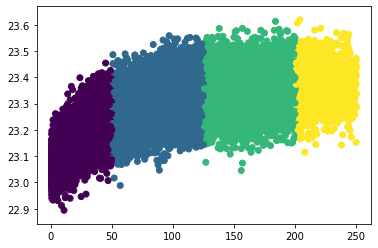

In [76]:
plt.scatter(dfTrain['ttf'], dfTrain['s21'], c=dfTrain['label_mcc'])

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [0]:
cols = dfTrain.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfTrain)
dfTrainZ=pd.DataFrame(np_scaled, columns = cols)

In [0]:
dfTrainZ

In [81]:
Xt = dfTrainZ.iloc[:,2:-3] #matriz de diseño
Xt.shape

(20631, 14)

In [88]:
pca = PCA(n_components = 2) #(14) debe ser menor o igual que el numero de columnas (14)
projecta = pca.fit_transform(Xt)
print(Xt.shape)
print(projecta.shape)

(20631, 14)
(20631, 2)


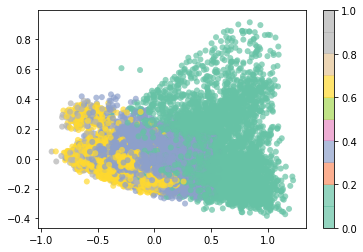

In [94]:
plt.scatter(projecta[:,0], projecta[:,1], c=dfTrainZ.label_mcc, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('Set2',10))
plt.colorbar()